Decision Tree Accuracy: 0.710
Confusion Matrix:
 [[42 16]
 [15 34]]


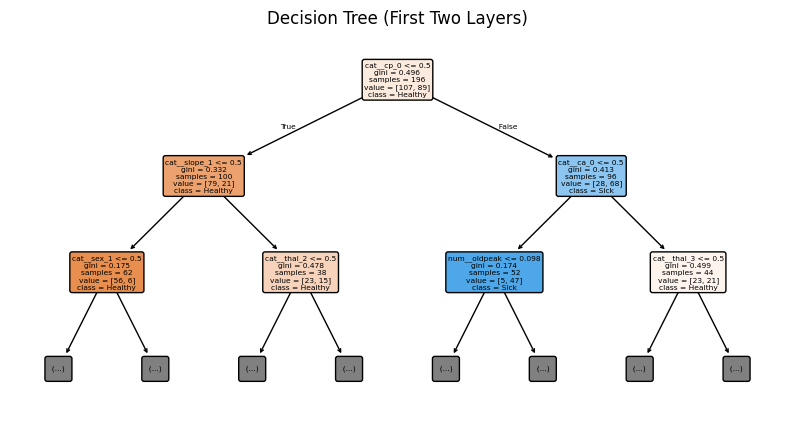


Best Decision Tree Accuracy: 0.832
Confusion Matrix:
 [[53  5]
 [13 36]]
Best Params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 16}
MLP Accuracy: 0.794
Confusion Matrix:
 [[45 13]
 [ 9 40]]
Decision Tree Train Time: 0.0000s | Predict Time: 0.000000s
MLP Train Time: 2.5350s | Predict Time: 0.003564s
Explained Variance Ratios:
PC1: 23.26%
PC2: 12.79%
PC3: 11.09%
PC4: 9.12%
PC5: 7.68%
PC6: 6.70%
PC7: 6.20%
PC8: 4.91%
Decision Tree Accuracy: 0.729
Confusion Matrix:
 [[44 14]
 [15 34]]


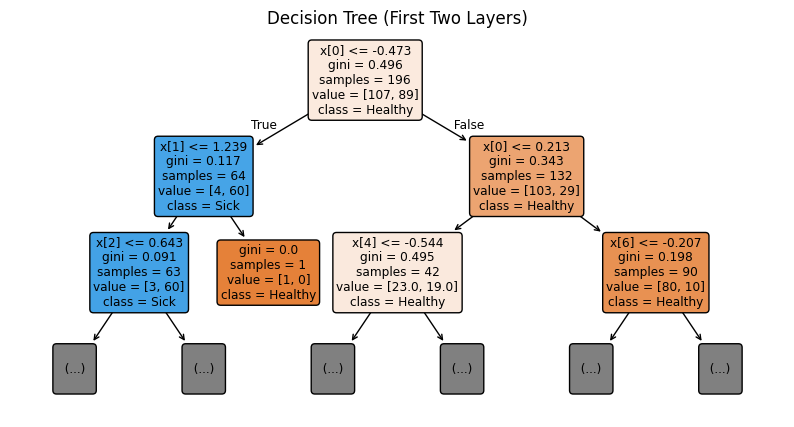

Explained Variance Ratios:
PC1: 23.26%
PC2: 12.79%
PC3: 11.09%
PC4: 9.12%
PC5: 7.68%
PC6: 6.70%
PC7: 6.20%
PC8: 4.91%
MLP Accuracy: 0.832
Confusion Matrix:
 [[49  9]
 [ 9 40]]


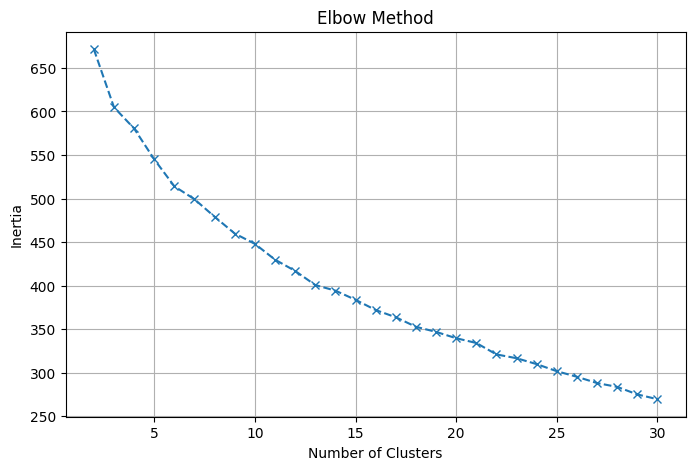

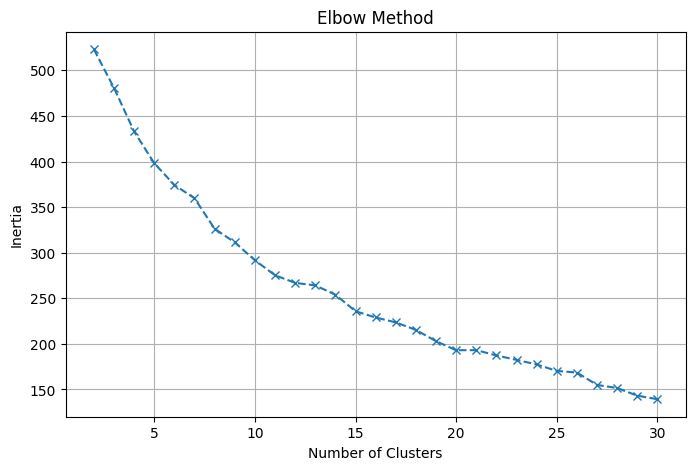

✅ Results saved to results/metrics.txt


In [6]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

from src.preprocess import load_and_preprocess
from src.decision_tree_model import train_decision_tree, optimize_decision_tree
from src.mlp_model import train_mlp, compare_speed
from src.pca_analysis import apply_pca
from src.kmeans_clustering import elbow_method

X_train, X_test, y_train, y_test, feature_names = load_and_preprocess("../data/heartdisease.csv")

# Decision Tree baseline + tuning
_, dt_acc, _ = train_decision_tree(X_train, y_train, X_test, y_test, feature_names)
_, best_acc, _, best_params = optimize_decision_tree(X_train, y_train, X_test, y_test)
print("Best Params:", best_params)

# MLP
_, mlp_acc, _ = train_mlp(X_train, y_train, X_test, y_test)
compare_speed(X_train, y_train, X_test, y_test)

# PCA + Decision Tree
X_train_pca, X_test_pca, _ = apply_pca(X_train, X_test)
_, _, _ = train_decision_tree(X_train_pca, y_train, X_test_pca, y_test, feature_names=None)

# PCA + MLP
from src.mlp_model import train_mlp
X_train_pca, X_test_pca, _ = apply_pca(X_train, X_test)
_, pca_mlp_acc, _ = train_mlp(X_train_pca, y_train, X_test_pca, y_test)

# K-Means elbow method
elbow_method(X_train)
elbow_method(X_train_pca)

# === Save all results to file ===

# Create the results text (you can adjust formatting if desired)
results_text = f"""
Heart Disease Classification - Model Results
============================================

Decision Tree (Default) Accuracy: {dt_acc:.3f}
Decision Tree (Tuned) Accuracy: {best_acc:.3f}
MLP Accuracy: {mlp_acc:.3f}
PCA + MLP Accuracy: {pca_mlp_acc:.3f}

Best Decision Tree Parameters: {best_params}

Notes:
- MLP tends to generalize better on nonlinear boundaries.
- PCA improved interpretability and reduced noise.
"""

# Ensure the results directory exists
os.makedirs("../results", exist_ok=True)

# Write (or overwrite) metrics.txt
with open("../results/metrics.txt", "w") as f:
    f.write(results_text)

print("✅ Results saved to results/metrics.txt")
